# Import Necessary Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Loader

In [ ]:
df = pd.read_csv("Dataset_spine.csv")

In [ ]:
df.head()

# Data Pre-processing

In [ ]:
df.info()

In [ ]:
df["Unnamed: 13"].dropna().values

In [ ]:
column_values = df["Unnamed: 13"].dropna().values
# Initialize a list to store lines containing the "=" sign
lines_with_equals_sign = []

# Iterate over the values of the column and split the data
for line in column_values:
    if "=" in line:
        # Split the line at "=", and take the part after it
        data = line.split("=")[1].strip()
       # Split again at "(" to remove any content within parentheses
        data_without_parentheses = data.split("(")[0].strip()
        # Append the processed data to the list
        lines_with_equals_sign.append(data_without_parentheses)

# Print the lines containing "=" sign
for line in lines_with_equals_sign:
    print(line)

In [ ]:
# Rename the columns before "class_att" column accordingly
for i, data in enumerate(lines_with_equals_sign):
    if i < len(df.columns) - 1:  # Check if it's before "class_att" column
        df.rename(columns={df.columns[i]: data}, inplace=True)

df.head()

Drop unnamed column, and renamed the last column name to State

In [ ]:
# Rename "Class_att" column to "State"
df.rename(columns={"Class_att": "State"}, inplace=True)

# Drop the "Unnamed: 13" column
df.drop(columns=["Unnamed: 13"], inplace=True, axis=1)

df.head()

In [ ]:
df['State'].value_counts()

In [ ]:
df.columns.tolist()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
df.select_dtypes(include=np.number).columns.tolist()

In [ ]:
df.head(2)

In [ ]:
X=df[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis',
 'pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(data = scaled_data, columns = X.columns)
scaled_df.head(2)

In [ ]:
y=df['State']
df=scaled_df.join(y)
df.head(2)

# Exploratory Data Analysis

In [ ]:
df['State'].value_counts()

In [ ]:
sns.set()
sns.countplot(x = "State",data=df)
plt.show()

In [ ]:
df['State'].value_counts()*100.0 /len(df)

In [ ]:
sns.set_theme(style='darkgrid')
df.plot(kind='hist', subplots=True, layout=(4,3), sharex=False ,figsize=(15,12),title = "Features Distribution")
plt.show()

In [ ]:
sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(2,3,figsize=(16,10))
sns.histplot(data=df,x='pelvic_incidence', hue='State', multiple="stack", ax=ax[0][0])
sns.histplot(data=df,x='pelvic_tilt', hue='State', multiple="stack", ax=ax[0][1])
sns.histplot(data=df,x='lumbar_lordosis_angle', hue='State', multiple="stack", ax=ax[0][2])
sns.histplot(data=df,x='sacral_slope', hue='State', multiple="stack", ax=ax[1][0]) 
sns.histplot(data=df,x='pelvic_radius', hue='State', multiple="stack", ax=ax[1][1])
sns.histplot(data=df,x='degree_spondylolisthesis', hue='State', multiple="stack", ax=ax[1][2])
plt.show()

In [ ]:
sns.set_theme(style='darkgrid')
df.plot(kind='density', subplots=True, layout=(4,3), sharex=False ,figsize=(15,12))
plt.show()

In [ ]:
sns.set_theme(style='white')
fig, ax = plt.subplots(4,3,figsize=(20,25))
sns.set_palette('Set1')

sns.scatterplot(data=df,ax=ax[0][0],y='pelvic_incidence', hue='State',x='pelvic_incidence')
sns.scatterplot(data=df,ax=ax[0][1],y='pelvic_incidence', hue='State',x='pelvic_tilt')
sns.scatterplot(data=df,ax=ax[0][2],y='pelvic_incidence', hue='State',x='lumbar_lordosis_angle')
sns.scatterplot(data=df,ax=ax[1][0],y='pelvic_incidence', hue='State',x='sacral_slope')
sns.scatterplot(data=df,ax=ax[1][1],y='pelvic_incidence', hue='State',x='pelvic_radius')
sns.scatterplot(data=df,ax=ax[1][2],y='pelvic_incidence', hue='State',x='degree_spondylolisthesis')
sns.scatterplot(data=df,ax=ax[2][0],y='pelvic_incidence', hue='State',x='pelvic_slope')
sns.scatterplot(data=df,ax=ax[2][1],y='pelvic_incidence', hue='State',x='Direct_tilt')
sns.scatterplot(data=df,ax=ax[2][2],y='pelvic_incidence', hue='State',x='thoracic_slope')
sns.scatterplot(data=df,ax=ax[3][0],y='pelvic_incidence', hue='State',x='cervical_tilt')   
sns.scatterplot(data=df,ax=ax[3][1],y='pelvic_incidence', hue='State',x='sacrum_angle')
sns.scatterplot(data=df,ax=ax[3][2],y='pelvic_incidence', hue='State',x='scoliosis_slope')

plt.show()

In [ ]:
sns.set_theme(style='white')
fig, ax = plt.subplots(4,3,figsize=(20,25))

sns.regplot(data=df,ax=ax[0][0],y='pelvic_incidence', color="r",x='pelvic_incidence')
sns.regplot(data=df,ax=ax[0][1],y='pelvic_incidence', color="r",x='pelvic_tilt')
sns.regplot(data=df,ax=ax[0][2],y='pelvic_incidence', color="r",x='lumbar_lordosis_angle')
sns.regplot(data=df,ax=ax[1][0],y='pelvic_incidence', color="r",x='sacral_slope')
sns.regplot(data=df,ax=ax[1][1],y='pelvic_incidence', color="r",x='pelvic_radius')
sns.regplot(data=df,ax=ax[1][2],y='pelvic_incidence', color="r",x='degree_spondylolisthesis')
sns.regplot(data=df,ax=ax[2][0],y='pelvic_incidence', color="r",x='pelvic_slope')
sns.regplot(data=df,ax=ax[2][1],y='pelvic_incidence', color="r",x='Direct_tilt')
sns.regplot(data=df,ax=ax[2][2],y='pelvic_incidence', color="r",x='thoracic_slope')
sns.regplot(data=df,ax=ax[3][0],y='pelvic_incidence', color="r",x='cervical_tilt')   
sns.regplot(data=df,ax=ax[3][1],y='pelvic_incidence', color="r",x='sacrum_angle')
sns.regplot(data=df,ax=ax[3][2],y='pelvic_incidence', color="r",x='scoliosis_slope')

In [ ]:
fig, ax = plt.subplots(4,3,figsize=(20,25))
sns.set_palette('rainbow')

sns.scatterplot(data=df,ax=ax[0][0],y='pelvic_tilt', hue='State',x='pelvic_incidence')
sns.scatterplot(data=df,ax=ax[0][1],y='pelvic_tilt', hue='State',x='pelvic_tilt')
sns.scatterplot(data=df,ax=ax[0][2],y='pelvic_tilt', hue='State',x='lumbar_lordosis_angle')
sns.scatterplot(data=df,ax=ax[1][0],y='pelvic_tilt', hue='State',x='sacral_slope')
sns.scatterplot(data=df,ax=ax[1][1],y='pelvic_tilt', hue='State',x='pelvic_radius')
sns.scatterplot(data=df,ax=ax[1][2],y='pelvic_tilt', hue='State',x='degree_spondylolisthesis')
sns.scatterplot(data=df,ax=ax[2][0],y='pelvic_tilt', hue='State',x='pelvic_slope')
sns.scatterplot(data=df,ax=ax[2][1],y='pelvic_tilt', hue='State',x='Direct_tilt')
sns.scatterplot(data=df,ax=ax[2][2],y='pelvic_tilt', hue='State',x='thoracic_slope')
sns.scatterplot(data=df,ax=ax[3][0],y='pelvic_tilt', hue='State',x='cervical_tilt')   
sns.scatterplot(data=df,ax=ax[3][1],y='pelvic_tilt', hue='State',x='sacrum_angle')
sns.scatterplot(data=df,ax=ax[3][2],y='pelvic_tilt', hue='State',x='scoliosis_slope')

plt.show()

In [ ]:
fig, ax = plt.subplots(4,3,figsize=(20,25))

sns.regplot(data=df,ax=ax[0][0],y='pelvic_tilt', color="r",x='pelvic_incidence')
sns.regplot(data=df,ax=ax[0][1],y='pelvic_tilt', color="r",x='pelvic_tilt')
sns.regplot(data=df,ax=ax[0][2],y='pelvic_tilt', color="r",x='lumbar_lordosis_angle')
sns.regplot(data=df,ax=ax[1][0],y='pelvic_tilt', color="r",x='sacral_slope')
sns.regplot(data=df,ax=ax[1][1],y='pelvic_tilt', color="r",x='pelvic_radius')
sns.regplot(data=df,ax=ax[1][2],y='pelvic_tilt', color="r",x='degree_spondylolisthesis')
sns.regplot(data=df,ax=ax[2][0],y='pelvic_tilt', color="r",x='pelvic_slope')
sns.regplot(data=df,ax=ax[2][1],y='pelvic_tilt', color="r",x='Direct_tilt')
sns.regplot(data=df,ax=ax[2][2],y='pelvic_tilt', color="r",x='thoracic_slope')
sns.regplot(data=df,ax=ax[3][0],y='pelvic_tilt', color="r",x='cervical_tilt')   
sns.regplot(data=df,ax=ax[3][1],y='pelvic_tilt', color="r",x='sacrum_angle')
sns.regplot(data=df,ax=ax[3][2],y='pelvic_tilt', color="r",x='scoliosis_slope')

plt.show()

In [ ]:
fig, ax = plt.subplots(4,3,figsize=(20,25))
sns.set_palette('Set3')

sns.scatterplot(data=df,ax=ax[0][0],y='lumbar_lordosis_angle', hue='State',x='pelvic_incidence')
sns.scatterplot(data=df,ax=ax[0][1],y='lumbar_lordosis_angle', hue='State',x='pelvic_tilt')
sns.scatterplot(data=df,ax=ax[0][2],y='lumbar_lordosis_angle', hue='State',x='lumbar_lordosis_angle')
sns.scatterplot(data=df,ax=ax[1][0],y='lumbar_lordosis_angle', hue='State',x='sacral_slope')
sns.scatterplot(data=df,ax=ax[1][1],y='lumbar_lordosis_angle', hue='State',x='pelvic_radius')
sns.scatterplot(data=df,ax=ax[1][2],y='lumbar_lordosis_angle', hue='State',x='degree_spondylolisthesis')
sns.scatterplot(data=df,ax=ax[2][0],y='lumbar_lordosis_angle', hue='State',x='pelvic_slope')
sns.scatterplot(data=df,ax=ax[2][1],y='lumbar_lordosis_angle', hue='State',x='Direct_tilt')
sns.scatterplot(data=df,ax=ax[2][2],y='lumbar_lordosis_angle', hue='State',x='thoracic_slope')
sns.scatterplot(data=df,ax=ax[3][0],y='lumbar_lordosis_angle', hue='State',x='cervical_tilt')   
sns.scatterplot(data=df,ax=ax[3][1],y='lumbar_lordosis_angle', hue='State',x='sacrum_angle')
sns.scatterplot(data=df,ax=ax[3][2],y='lumbar_lordosis_angle', hue='State',x='scoliosis_slope')

plt.show()

In [ ]:
fig, ax = plt.subplots(4,3,figsize=(20,25))

sns.regplot(data=df,ax=ax[0][0],y='lumbar_lordosis_angle', color="g",x='pelvic_incidence')
sns.regplot(data=df,ax=ax[0][1],y='lumbar_lordosis_angle', color="g",x='pelvic_tilt')
sns.regplot(data=df,ax=ax[0][2],y='lumbar_lordosis_angle', color="g",x='lumbar_lordosis_angle')
sns.regplot(data=df,ax=ax[1][0],y='lumbar_lordosis_angle', color="g",x='sacral_slope')
sns.regplot(data=df,ax=ax[1][1],y='lumbar_lordosis_angle', color="g",x='pelvic_radius')
sns.regplot(data=df,ax=ax[1][2],y='lumbar_lordosis_angle', color="g",x='degree_spondylolisthesis')
sns.regplot(data=df,ax=ax[2][0],y='lumbar_lordosis_angle', color="g",x='pelvic_slope')
sns.regplot(data=df,ax=ax[2][1],y='lumbar_lordosis_angle', color="g",x='Direct_tilt')
sns.regplot(data=df,ax=ax[2][2],y='lumbar_lordosis_angle', color="g",x='thoracic_slope')
sns.regplot(data=df,ax=ax[3][0],y='lumbar_lordosis_angle', color="g",x='cervical_tilt')   
sns.regplot(data=df,ax=ax[3][1],y='lumbar_lordosis_angle', color="g",x='sacrum_angle')
sns.regplot(data=df,ax=ax[3][2],y='lumbar_lordosis_angle', color="g",x='scoliosis_slope')

plt.show()

In [ ]:
fig, ax = plt.subplots(4,3,figsize=(20,25))

sns.regplot(data=df,ax=ax[0][0],y='pelvic_radius', color="m",x='pelvic_incidence')
sns.regplot(data=df,ax=ax[0][1],y='pelvic_radius', color="m",x='pelvic_tilt')
sns.regplot(data=df,ax=ax[0][2],y='pelvic_radius', color="m",x='lumbar_lordosis_angle')
sns.regplot(data=df,ax=ax[1][0],y='pelvic_radius', color="m",x='sacral_slope')
sns.regplot(data=df,ax=ax[1][1],y='pelvic_radius', color="m",x='pelvic_radius')
sns.regplot(data=df,ax=ax[1][2],y='pelvic_radius', color="m",x='degree_spondylolisthesis')
sns.regplot(data=df,ax=ax[2][0],y='pelvic_radius', color="m",x='pelvic_slope')
sns.regplot(data=df,ax=ax[2][1],y='pelvic_radius', color="m",x='Direct_tilt')
sns.regplot(data=df,ax=ax[2][2],y='pelvic_radius', color="m",x='thoracic_slope')
sns.regplot(data=df,ax=ax[3][0],y='pelvic_radius', color="m",x='cervical_tilt')   
sns.regplot(data=df,ax=ax[3][1],y='pelvic_radius', color="m",x='sacrum_angle')
sns.regplot(data=df,ax=ax[3][2],y='pelvic_radius', color="m",x='scoliosis_slope')

plt.show()

In [ ]:
fig, ax = plt.subplots(4,3,figsize=(20,25))
sns.set_palette('Set2')

sns.scatterplot(data=df,ax=ax[0][0],y='degree_spondylolisthesis', hue='State',x='pelvic_incidence')
sns.scatterplot(data=df,ax=ax[0][1],y='degree_spondylolisthesis', hue='State',x='pelvic_tilt')
sns.scatterplot(data=df,ax=ax[0][2],y='degree_spondylolisthesis', hue='State',x='lumbar_lordosis_angle')
sns.scatterplot(data=df,ax=ax[1][0],y='degree_spondylolisthesis', hue='State',x='sacral_slope')
sns.scatterplot(data=df,ax=ax[1][1],y='degree_spondylolisthesis', hue='State',x='pelvic_radius')
sns.scatterplot(data=df,ax=ax[1][2],y='degree_spondylolisthesis', hue='State',x='degree_spondylolisthesis')
sns.scatterplot(data=df,ax=ax[2][0],y='degree_spondylolisthesis', hue='State',x='pelvic_slope')
sns.scatterplot(data=df,ax=ax[2][1],y='degree_spondylolisthesis', hue='State',x='Direct_tilt')
sns.scatterplot(data=df,ax=ax[2][2],y='degree_spondylolisthesis', hue='State',x='thoracic_slope')
sns.scatterplot(data=df,ax=ax[3][0],y='degree_spondylolisthesis', hue='State',x='cervical_tilt')   
sns.scatterplot(data=df,ax=ax[3][1],y='degree_spondylolisthesis', hue='State',x='sacrum_angle')
sns.scatterplot(data=df,ax=ax[3][2],y='degree_spondylolisthesis', hue='State',x='scoliosis_slope')

plt.show()

In [ ]:
fig, ax = plt.subplots(4,3,figsize=(20,25))
sns.regplot(data=df,ax=ax[0][0],y='degree_spondylolisthesis', color="g",x='pelvic_incidence')
sns.regplot(data=df,ax=ax[0][1],y='degree_spondylolisthesis', color="g",x='pelvic_tilt')
sns.regplot(data=df,ax=ax[0][2],y='degree_spondylolisthesis', color="g",x='lumbar_lordosis_angle')
sns.regplot(data=df,ax=ax[1][0],y='degree_spondylolisthesis', color="g",x='sacral_slope')
sns.regplot(data=df,ax=ax[1][1],y='degree_spondylolisthesis', color="g",x='pelvic_radius')
sns.regplot(data=df,ax=ax[1][2],y='degree_spondylolisthesis', color="g",x='degree_spondylolisthesis')
sns.regplot(data=df,ax=ax[2][0],y='degree_spondylolisthesis', color="g",x='pelvic_slope')
sns.regplot(data=df,ax=ax[2][1],y='degree_spondylolisthesis', color="g",x='Direct_tilt')
sns.regplot(data=df,ax=ax[2][2],y='degree_spondylolisthesis', color="g",x='thoracic_slope')
sns.regplot(data=df,ax=ax[3][0],y='degree_spondylolisthesis', color="g",x='cervical_tilt')   
sns.regplot(data=df,ax=ax[3][1],y='degree_spondylolisthesis', color="g",x='sacrum_angle')
sns.regplot(data=df,ax=ax[3][2],y='degree_spondylolisthesis', color="g",x='scoliosis_slope')
plt.show()

In [ ]:
fig, ax = plt.subplots(4,3,figsize=(20,25))
sns.set_palette('Set2')

sns.violinplot( data=df ,ax=ax[0][0], x ='State', orient='v',y ='pelvic_incidence')
sns.violinplot( data=df ,ax=ax[0][1], x ='State', orient='v',y ='pelvic_tilt')
sns.violinplot( data=df ,ax=ax[0][2], x ='State', orient='v',y ='lumbar_lordosis_angle')
sns.violinplot( data=df ,ax=ax[1][0], x ='State', orient='v',y ='sacral_slope')
sns.violinplot( data=df ,ax=ax[1][1], x ='State', orient='v',y ='pelvic_radius')
sns.violinplot( data=df ,ax=ax[1][2], x ='State', orient='v',y ='degree_spondylolisthesis')  
sns.violinplot( data=df ,ax=ax[2][0], x ='State', orient='v',y ='pelvic_slope')
sns.violinplot( data=df ,ax=ax[2][1], x ='State', orient='v',y ='Direct_tilt')
sns.violinplot( data=df ,ax=ax[2][2], x ='State', orient='v',y ='thoracic_slope')
sns.violinplot( data=df ,ax=ax[3][0], x ='State', orient='v',y ='cervical_tilt')
sns.violinplot( data=df ,ax=ax[3][1], x ='State', orient='v',y ='sacrum_angle')
sns.violinplot( data=df ,ax=ax[3][2], x ='State', orient='v',y ='scoliosis_slope')

plt.show()

In [ ]:
sns.set()
sns.pairplot(df,hue="State", palette='Set3')
plt.show()

In [ ]:
df_selected = df[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius',
                 'degree_spondylolisthesis','State',]]

sns.set_style('white')
sns.pairplot(df_selected ,hue='State',palette='husl')
plt.show()

In [ ]:
# df.to_csv('new_preprocessed_data.csv', index=False)

In [ ]:
numeric_df = df.select_dtypes(include='number') # Select only numeric columns
sns.heatmap(numeric_df.corr(), cmap="viridis", annot=True, linewidths=.5, fmt='.1f')
plt.show()

In [ ]:
df_selected = df[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope',
                 'degree_spondylolisthesis',]]


plt.subplots(figsize=(10,10))
sns.heatmap(df_selected.corr(),cmap="viridis", annot=True, linewidths=.5, fmt= '.2f')
plt.show()

In [ ]:
scaled_df.describe()

In [ ]:
df.describe(include =['O'])

In [ ]:
SpineCondition_summary = df.groupby('State')
SpineCondition_summary.mean().reset_index()

In [ ]:
SpineCondition_summary.var().reset_index()

In [ ]:
SpineCondition_summary.std().reset_index()

In [ ]:
SpineCondition_summary.median().reset_index()

In [ ]:
df.select_dtypes(include=['number']).cov()


In [ ]:
df.select_dtypes(include=['number']).corr()

In [ ]:
correlation = df.select_dtypes(include=['number']).corr()
relevant_features_correlation =  correlation[correlation >0.5]
relevant_features_correlation

In [ ]:
plt.figure(figsize=(20,16))
sns.boxplot(data=df,palette= "Set3")
plt.show()

In [ ]:
df0=df[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','degree_spondylolisthesis',
        'State']]

plt.figure(figsize=(15,8))
sns.set()
sns.boxplot(data=df0,palette= "Set3",orient="h")
plt.show()

In [ ]:
numeric_columns = df0.select_dtypes(include=['number'])

q1 = numeric_columns.quantile(q=0.25)
q2 = numeric_columns.quantile(q=0.50)
q3 = numeric_columns.quantile(q=0.75)

iqr = q3 - q1
print(iqr)

In [ ]:
Upper_limit =q3 + (1.5 * iqr)
Lower_limit =q1 - (1.5 * iqr)

print(Upper_limit, '\n')
print(Lower_limit)

Remove outliers

In [ ]:
df1 = df0[(df0["pelvic_incidence"] > Lower_limit["pelvic_incidence"])
             & (df0["pelvic_incidence"] < Upper_limit["pelvic_incidence"])]

df0.shape[0] - df1.shape[0]

In [ ]:
df2 = df1[(df1["pelvic_tilt"] > Lower_limit["pelvic_tilt"])
             & (df1["pelvic_tilt"] < Upper_limit["pelvic_tilt"])]

df1.shape[0] - df2.shape[0]

In [ ]:
df3 = df2[(df2["lumbar_lordosis_angle"] > Lower_limit["lumbar_lordosis_angle"])
             & (df2["lumbar_lordosis_angle"] < Upper_limit["lumbar_lordosis_angle"])]

df2.shape[0] - df3.shape[0]

In [ ]:
df4 = df3[(df3["sacral_slope"] > Lower_limit["sacral_slope"])
             & (df3["sacral_slope"] < Upper_limit["sacral_slope"])]

df3.shape[0] - df4.shape[0]

In [ ]:
df_final = df4[(df4["degree_spondylolisthesis"] > Lower_limit["degree_spondylolisthesis"])
             & (df4["degree_spondylolisthesis"] < Upper_limit["degree_spondylolisthesis"])]

df4.shape[0] - df_final.shape[0]

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_final, palette= "Set3",orient="h")
plt.show()

In [ ]:
df_final.shape[0]

In [ ]:
df_final['State'].value_counts()*100.0 /len(df)

In [ ]:
df_final.head()

convertion of categorical data to numerical data

In [ ]:
df_final.select_dtypes(include=['object']).columns.tolist()

In [ ]:
df_final['State'] =df_final['State'].map({'Abnormal': 0, 'Normal': 1}).astype(int)
df_final.head(2)

In [ ]:
df_final.to_csv('Cleaned.csv')

In [2]:
new_df = pd.read_csv('Cleaned.csv')

# Standard Scaler to transform distribution to a mean value of 0 and SD of 1

In [3]:
X=new_df[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','degree_spondylolisthesis']]
y=new_df['State']

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data = X_scaled_data, columns = X.columns)
X_scaled.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,degree_spondylolisthesis
0,0.264522,0.789374,-0.623128,-0.180492,-0.848969
1,-1.251939,-0.744388,-1.431298,-1.102302,-0.656263
2,0.631712,0.748351,-0.042598,0.312428,-0.979979
3,0.661128,1.047255,-0.362735,0.154280,-0.390428
4,-0.577818,-0.794596,-1.248439,-0.213773,-0.522121


# Below can start for model building

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

## Support Vector Machine Model Building

In [6]:
X = X_scaled
y = new_df['State']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
print('No of rows in X = ',X.shape[0])
print('No of rows in X_train = ',X_train.shape[0])
print('No of rows in X_test = ',X_test.shape[0])
print('-------------------------------')
print('No of rows in y = ',y.shape[0])
print('No of rows in y_train = ',y_train.shape[0])
print('No of rows in y_test = ',y_test.shape[0])

No of rows in X =  288
No of rows in X_train =  230
No of rows in X_test =  58
-------------------------------
No of rows in y =  288
No of rows in y_train =  230
No of rows in y_test =  58


In [48]:
svc_classifier = SVC(kernel='linear', random_state=1)

svcModel = svc_classifier.fit(X_train, y_train)

svc_y_pred = svcModel.predict(X_test)

svc_train_score = svcModel.score(X_train, y_train)
svc_test_score  = svcModel.score(X_test, y_test)

print("SVM Model:")
print ("Training Score: {}\nTest Score: {}" .format(svc_train_score, svc_test_score))

SVM Model:
Training Score: 0.8260869565217391
Test Score: 0.8448275862068966


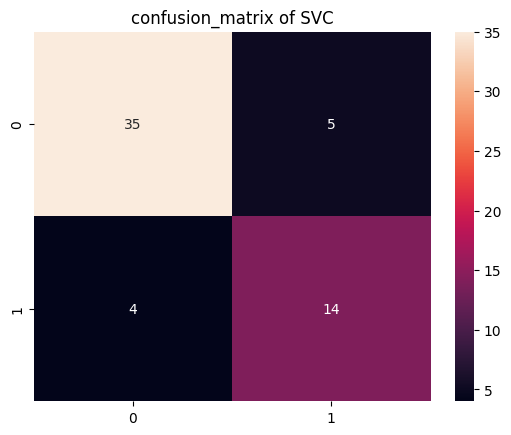

In [49]:
from sklearn.metrics import confusion_matrix

plt.title('confusion_matrix of SVC')
sns.heatmap(confusion_matrix(y_test,svc_y_pred),annot=True,fmt="d")
plt.show()

In [50]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,svc_y_pred))

from sklearn import metrics
metrics.accuracy_score(y_test, svc_y_pred)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        40
           1       0.74      0.78      0.76        18

    accuracy                           0.84        58
   macro avg       0.82      0.83      0.82        58
weighted avg       0.85      0.84      0.85        58



0.8448275862068966

## Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)
rf_train_score = rf.score(X_train, y_train)
rf_test_score  = rf.score(X_test, y_test)

print("Random Forest Classifier Model:")
print ("Training Score: {}\nTest Score: {}" .format(rf_train_score, rf_test_score))

Random Forest Classifier Model:
Training Score: 1.0
Test Score: 0.7931034482758621


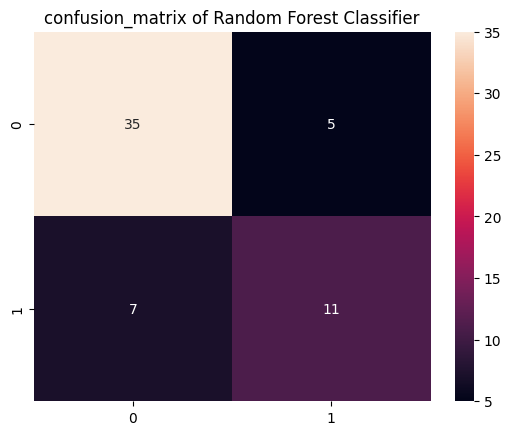

In [52]:
from sklearn.metrics import confusion_matrix

plt.title('confusion_matrix of Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test,rf_y_pred),annot=True,fmt="d")
plt.show()

In [53]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,rf_y_pred))

from sklearn import metrics
metrics.accuracy_score(y_test, rf_y_pred)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        40
           1       0.69      0.61      0.65        18

    accuracy                           0.79        58
   macro avg       0.76      0.74      0.75        58
weighted avg       0.79      0.79      0.79        58



0.7931034482758621

## Neural Network

In [24]:
import pandas as pd
import torch
from torch.utils.data import TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import time
import copy
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [25]:
X = X_scaled
y = new_df['State']

X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size=0.20,
                                                  random_state=6,
                                                  shuffle=True)
print(f'X_train: {X_train.shape}')
print(f'X_val: {X_val.shape}')

X_train = X_train.values
X_val = X_val.values
y_train = y_train.values
y_val = y_val.values

# fit on training set
sc = StandardScaler()
sc.fit(X_train)

# Apply scaling params to both sets
X_train = sc.transform(X_train)
X_val = sc.transform(X_val)


X_train: (230, 5)
X_val: (58, 5)


In [26]:
X_train_tensor = torch.FloatTensor(X_train)
X_val_tensor = torch.FloatTensor(X_val)
y_train_tensor = torch.FloatTensor(y_train)
y_val_tensor = torch.FloatTensor(y_val)

In [27]:
# Builds dataset containing ALL data points
train_dataset = TensorDataset(X_train_tensor,
                              y_train_tensor)
val_dataset = TensorDataset(X_val_tensor,
                            y_val_tensor)
print(train_dataset)

# Builds a loader of each set
batch_size = 16
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size, 
                          shuffle=True)

val_loader = DataLoader(dataset=val_dataset,
                        batch_size=batch_size)

type(train_loader)

for x,y in train_loader:
    print(x,y)
    break

tensor([[ 0.3279,  1.3533, -0.0406, -0.4659, -0.5769],
        [-0.0124,  1.8862, -0.2736, -1.2346, -0.7904],
        [-0.9020, -0.7924, -0.3564, -0.6123, -0.0644],
        [ 1.5845,  1.5967,  1.6802,  0.9434,  1.9008],
        [ 0.9968,  0.3514,  0.6604,  1.0156,  1.8326],
        [-1.0861,  0.0121, -0.5158, -1.3618, -0.5437],
        [ 1.3324,  2.4737,  1.8718,  0.0622,  2.4614],
        [-0.9700, -0.9089, -0.2554, -0.6218, -0.6548],
        [-1.6346, -1.5479, -1.3920, -1.0374, -0.9156],
        [ 1.8124,  1.5336, -0.2203,  1.2683,  1.1489],
        [ 0.9835,  1.8306,  2.0120,  0.0429,  1.2706],
        [-1.6313, -1.3783, -0.8003, -1.1429, -0.8549],
        [ 1.0281,  0.6662,  1.6595,  0.8511, -0.4452],
        [-0.3681,  0.5189, -1.1944, -0.7943, -0.8634],
        [-1.5805, -1.0824, -0.4627, -1.2708, -1.0045],
        [-1.0482, -0.3184, -0.6035, -1.1010, -0.8098]]) tensor([0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1.])


In [28]:
# Binary Classifier
class BinaryClassification(nn.Module):
    
    def __init__(self):
        super(BinaryClassification, self).__init__()
        
        # Number of input features is 12.
        self.layer_1 = nn.Linear(5, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)      # dropout layer
        self.batchnorm1 = nn.BatchNorm1d(64)  # batch normalisation
        self.batchnorm2 = nn.BatchNorm1d(64) 
        
    # Our Neural network
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = BinaryClassification()
opt = optim.Adam(model.parameters(), lr=1e-4)
loss = nn.BCEWithLogitsLoss()

In [29]:
def train_val(model, params, verbose=False):
    t0 = time.time()
    
    # read parameters from dictionary
    epochs=params["epochs"]
    loss_func=params["f_loss"]
    opt=params["optimiser"]
    train_dl=params["train"]
    val_dl=params["val"]
    lr_scheduler=params["lr_change"]
    weight_path=params["weight_path"]
    eval_funcs = params['eval_func'] # list of evaluation functions
    write_metric = params['write_metric']
    
    loss_history = {"train": [], "val": []} # history of loss values in each epoch
    best_model_wts = copy.deepcopy(model.state_dict()) # a deep copy of weights for the best performing model
    best_val = 0.0
    
    tr_dict_eval = {}; te_dict_eval = {}
    for evals in eval_funcs:
        tr_dict_eval[evals] = []
        te_dict_eval[evals] = []
    
    for epoch in range(epochs):
        current_lr = get_lr(opt)
        
        # Training mode
        model.train()
        train_loss, train_metric = loss_epoch(model,
                                              loss_func,
                                              train_dl,
                                              eval_funcs,
                                              opt)
        
        # Evaluate mode
        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model,
                                              loss_func,
                                              val_dl,
                                              eval_funcs)
            
        if val_metric['f1'] > best_val:
            # if verbose:
            #     print("saving model weights!")
            best_val = val_metric['f1']
            best_model_wts = copy.deepcopy(model.state_dict())
            # torch.save(model.state_dict(), weight_path)
            print(f"epoch: {epoch+1:03} | train loss: {train_loss:.3f} | val loss: {val_loss:.3f}")
            print(f"train-{write_metric}: {train_metric[write_metric]:.3f}") 
            print(f"val-{write_metric}: {val_metric[write_metric]:.3f}",'\n')
                
        loss_history["train"].append(train_loss)
        loss_history["val"].append(val_loss)
        
        for evals in eval_funcs:
            tr_dict_eval[evals].append(train_metric[evals])
            te_dict_eval[evals].append(val_metric[evals])
        
        lr_scheduler.step(val_loss)
        if current_lr != get_lr(opt):
            model.load_state_dict(best_model_wts) 

    # load best model weights after training & return it
    model.load_state_dict(best_model_wts)
    
    t1 = time.time()
    print(f'Total Time: {t1 - t0:.3f}')
        
    return model, loss_history, {'train': tr_dict_eval, 'val': te_dict_eval}

# Function to get the learning rate
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']

# Function to compute the loss value per batch of data
def loss_batch(loss_func, output, target, opt=None):
    
    loss = loss_func(output, target) # get loss
    
    if(opt is not None):
        opt.zero_grad()
        loss.backward()
        opt.step()

    return loss

# Compute the loss value & performance metric for the entire dataset (epoch)
def loss_epoch(model,loss_func,dataset_dl,eval_funcs,opt=None):
    
    run_loss=0.0
    
    t_metric = {}; metric = {}
    for i in eval_funcs:
        t_metric[i] = 0.0
        
    # internal loop over dataset
    for xb, yb in dataset_dl:
        
        xb=xb.to(device) # send data to device
        yb=yb.to(device)
        y_pred  = model(xb) # make prediction
        
        # having made a prediction get the loss for the batch        
        loss = loss_batch(loss_func,y_pred, yb[:,None],opt=opt) 
        
        for feval in eval_funcs:
            if(feval == 'accuracy'):
                t_metric[feval] += accuracy(y_pred, yb[:,None])
            if(feval == 'f1'):
                t_metric[feval] += f1(y_pred,yb[:,None])
            if(feval == 'recall'):
                t_metric[feval] += recall(y_pred,yb[:,None])
        
        run_loss += loss.item()
    loss=run_loss/len(dataset_dl)  # average loss value
    
    for feval in eval_funcs:
        temp = t_metric[feval]/len(dataset_dl)
        metric[feval] = temp  # average metric value
        
    return loss, metric

def accuracy(y_pred, y_true):
    y_pred = torch.round(torch.sigmoid(y_pred))
    correct = (y_pred == y_true).float()
    accuracy = correct.sum() / len(correct)
    return accuracy.item()

def f1(y_pred, y_true):
    y_pred = torch.round(torch.sigmoid(y_pred))
    tp = (y_pred * y_true).sum().float()
    tn = ((1 - y_pred) * (1 - y_true)).sum().float()
    fp = (y_pred * (1 - y_true)).sum().float()
    fn = ((1 - y_pred) * y_true).sum().float()

    epsilon = 1e-7  # to avoid division by zero
    precision = tp / (tp + fp + epsilon)
    recall = tp / (tp + fn + epsilon)
    f1_score = 2 * (precision * recall) / (precision + recall + epsilon)

    return f1_score.item()

def recall(y_pred, y_true):
    y_pred = torch.round(torch.sigmoid(y_pred))
    tp = (y_pred * y_true).sum().float()
    fn = ((1 - y_pred) * y_true).sum().float()

    epsilon = 1e-7  # to avoid division by zero
    recall_score = tp / (tp + fn + epsilon)

    return recall_score.item()

In [30]:
params_train={
    
  "train": train_loader,                                # training data loader
    "val": val_loader,                                  # validation data loader
 "epochs": 30,                                         # number of iterations
 "optimiser": opt,                                      # optimiser
 "lr_change": ReduceLROnPlateau(opt,                    # learning rate adjustor on the fly
                                mode='min',
                                factor=0.5,
                                patience=5,verbose=0),
 "f_loss": loss,                                        # loss function
 "weight_path": "weights.pt",                           # save best weights to file
 "eval_func" : ['accuracy','f1','recall','precision'],  # save evaluation metric history
 "write_metric" : 'f1'                                  # output to screen metric
}

nn_model,loss_hist,metric_hist=train_val(model,params_train,verbose=True)
epochs=params_train["epochs"] 

c:\Users\Cody\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


epoch: 001 | train loss: 0.721 | val loss: 0.689
train-f1: 0.375
val-f1: 0.467 

epoch: 002 | train loss: 0.664 | val loss: 0.668
train-f1: 0.507
val-f1: 0.615 

epoch: 003 | train loss: 0.618 | val loss: 0.629
train-f1: 0.567
val-f1: 0.712 

epoch: 012 | train loss: 0.520 | val loss: 0.542
train-f1: 0.681
val-f1: 0.746 

epoch: 017 | train loss: 0.475 | val loss: 0.485
train-f1: 0.677
val-f1: 0.750 

epoch: 020 | train loss: 0.438 | val loss: 0.483
train-f1: 0.726
val-f1: 0.759 

epoch: 028 | train loss: 0.430 | val loss: 0.457
train-f1: 0.713
val-f1: 0.765 

Total Time: 2.116


In [31]:
num_runs = 100  # Number of times to run the neural network
val_accuracies = []  # List to store validation accuracies

for run in range(num_runs):
    # Train the neural network
    nn_model, loss_hist, metric_hist = train_val(model, params_train, verbose=True)
    
    # Get the accuracy on the validation set
    val_accuracy = max(metric_hist['val']['accuracy'])
    val_accuracies.append(val_accuracy)

# Calculate the average validation accuracy
average_val_accuracy = sum(val_accuracies) / len(val_accuracies)

print("Average Validation Accuracy:", average_val_accuracy)


epoch: 001 | train loss: 0.425 | val loss: 0.461
train-f1: 0.753
val-f1: 0.754 

epoch: 004 | train loss: 0.426 | val loss: 0.459
train-f1: 0.728
val-f1: 0.765 

epoch: 016 | train loss: 0.419 | val loss: 0.447
train-f1: 0.720
val-f1: 0.775 

Total Time: 2.876
epoch: 001 | train loss: 0.406 | val loss: 0.450
train-f1: 0.761
val-f1: 0.754 

epoch: 003 | train loss: 0.401 | val loss: 0.446
train-f1: 0.757
val-f1: 0.775 

Total Time: 3.398
epoch: 001 | train loss: 0.390 | val loss: 0.447
train-f1: 0.774
val-f1: 0.775 

Total Time: 2.070
epoch: 001 | train loss: 0.392 | val loss: 0.454
train-f1: 0.775
val-f1: 0.754 

epoch: 002 | train loss: 0.389 | val loss: 0.451
train-f1: 0.753
val-f1: 0.775 

Total Time: 2.195
epoch: 001 | train loss: 0.434 | val loss: 0.455
train-f1: 0.706
val-f1: 0.765 

epoch: 003 | train loss: 0.403 | val loss: 0.444
train-f1: 0.761
val-f1: 0.775 

Total Time: 2.515
epoch: 001 | train loss: 0.426 | val loss: 0.453
train-f1: 0.709
val-f1: 0.765 

epoch: 003 | train 

In [ ]:
average_val_accuracy = 0.787499999

In [32]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import classification_report, accuracy_score

# Lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate over the validation dataset and make predictions
for inputs, labels in val_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = nn_model(inputs)
    predictions = torch.round(torch.sigmoid(outputs))  # Convert logits to class labels (0 or 1)
    true_labels.extend(labels.cpu().detach().numpy())  # Detach and append true labels
    predicted_labels.extend(predictions.cpu().detach().numpy())  # Detach and append predicted labels

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Calculate classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

# Calculate accuracy score
acc = accuracy_score(true_labels, predicted_labels)
print("Accuracy Score:", acc)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.75      0.79        32
         1.0       0.72      0.81      0.76        26

    accuracy                           0.78        58
   macro avg       0.78      0.78      0.78        58
weighted avg       0.78      0.78      0.78        58

Accuracy Score: 0.7758620689655172


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Function to get model predictions
def get_predictions(model, dataloader):
    model.eval()
    predictions = []
    true_labels = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            predictions.extend(torch.round(torch.sigmoid(outputs)).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    return predictions, true_labels

# Get predictions on validation data
val_predictions, val_true_labels = get_predictions(nn_model, val_loader)

# Plot confusion matrix
plot_confusion_matrix(val_true_labels, val_predictions)


In [ ]:
def plot_res(metric_hist,name):
    
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=['lost_hist',f'metric_{name}'])

    # Training Data 

    fig.add_trace(go.Scatter(x=[*range(1,epochs+1)],
                             y=loss_hist["train"],
                              line=dict(color="#94D4F6",width=2),
                             name='train-loss'),row=1, col=1)
    fig.add_trace(go.Scatter(x=[*range(1,epochs+1)],
                             y=metric_hist["train"][name],
                             line=dict(color="#94D4F6",width=2),
                             name=f'train-{name}'),row=1, col=2)

    # Validation Data

    fig.add_trace(go.Scatter(x=[*range(1,epochs+1)],
                             y=loss_hist["val"],
                             line=dict(color="#454545",width=2),
                             name='val-loss'),row=1, col=1)
    fig.add_trace(go.Scatter(x=[*range(1,epochs+1)],
                             y=metric_hist["val"][name],
                             line=dict(color="#454545",width=2),
                             name=f'val-{name}'),row=1, col=2)

    fig.update_layout(template='plotly_white',
                      title='Train / Validation Data Splitting',
                      font=dict(family='sans-serif',size=12),
                      )

    fig.update_traces({'marker_line_width':3, 
                       'marker_line_color':"black",
                       'marker_size':8,
                       'opacity':1.0,
                       'marker':{'showscale':True,'reversescale':True, 'cmid':0, 'size':10},
                      })

    fig.update_coloraxes(colorscale="tealgrn")
    fig.update_layout(coloraxis_showscale=False)
    fig.show()

In [ ]:
plot_res(metric_hist,'f1')

## Summary of all based model accuracy

In [54]:
models=pd.DataFrame({'Model':['SVC','Random Forest Classifier',"Neural Network"], # add remaining 2 algorithm into this tuple list after ","
                    'Accuracy': [svc_test_score*100,
                                    rf_test_score*100,
                                    average_val_accuracy*100
                                    ] # add remaining 2 algorithm test score this tuple list after ","
                                    })
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,SVC,84.482759
1,Random Forest Classifier,79.310345
2,Neural Network,78.749999


## Performing Cross Validation for SVM

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'kernel': ['linear', 'rbf']  # Kernel types
}

# Create the SVM classifier
svc_classifier = SVC(random_state=1)

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=svc_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

### Model Rebuild for SVM with best parameter

In [ ]:
new_svc_classifier = SVC(C=1,kernel='rbf', random_state=1)

NewSvcModel = new_svc_classifier.fit(X_train, y_train)

new_svc_y_pred = NewSvcModel.predict(X_test)

new_svc_train_score = NewSvcModel.score(X_train, y_train)
new_svc_test_score  = NewSvcModel.score(X_test, y_test)

print("SVM Model:")
print ("Training Score: {}\nTest Score: {}" .format(new_svc_train_score, new_svc_test_score))

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,new_svc_y_pred))

from sklearn import metrics
metrics.accuracy_score(y_test, new_svc_y_pred)

# Hypeparameter Optimization - Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# dictionary of hyperpararmeter of random forest
parameter_space = {
    'n_estimators': [100, 200, 500],
    'max_depth': [4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10 ,15, 20],
    'min_samples_leaf': [1, 2, 3, 4, 8,],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
}
# Create random forest classifier
rf = RandomForestClassifier(random_state=1)

# Perform Grid Search Cross Validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=parameter_space, n_iter=100, scoring='accuracy', cv=5, random_state=1)
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


### Model Rebuild for Random forest with best parameter

In [ ]:
best_rf = RandomForestClassifier(random_state=1,
                                 n_estimators=200,
                                 min_samples_split=2,
                                 min_samples_leaf=4,
                                 max_features='log2',
                                 max_depth=6,
                                 criterion='gini')
new_rf = best_rf.fit(X_train, y_train)

best_rf_y_pred = new_rf.predict(X_test)
best_rf_train_score = new_rf.score(X_train, y_train)
best_rf_test_score  = new_rf.score(X_test, y_test)

print("Random Forest Classifier Model:")
print ("Training Score: {}\nTest Score: {}" .format(best_rf_train_score, best_rf_test_score))

In [ ]:
from sklearn.metrics import confusion_matrix

plt.title('confusion_matrix of Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test,best_rf_y_pred),annot=True,fmt="d")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, best_rf_y_pred))

from sklearn import metrics
metrics.accuracy_score(y_test, best_rf_y_pred)

## K-Fold validation 

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Reset index of X_train and y_train
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Initialize your model
validation_model = RandomForestClassifier(random_state=1,
                                 n_estimators=200,
                                 min_samples_split=2,
                                 min_samples_leaf=4,
                                 max_features='log2',
                                 max_depth=6,
                                 criterion='gini')

# Initialize KFold with desired number of folds
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create lists to store training scores and fold accuracies
training_scores = []
fold_accuracies = []

# Perform k-fold cross-validation
for fold_idx, (train_idx, val_idx) in enumerate(kfold.split(X_train, y_train)):
    # Get training and validation data for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Train the model
    validation_model.fit(X_train_fold, y_train_fold)
    
    # Calculate training score for this fold
    train_score = validation_model.score(X_train_fold, y_train_fold)
    training_scores.append(train_score)
    
    # Calculate accuracy for this fold
    fold_accuracy = validation_model.score(X_val_fold, y_val_fold)
    fold_accuracies.append(fold_accuracy)
    
    # Print training score and accuracy for this fold
    print(f"Fold {fold_idx + 1} - Training Score: {train_score:.4f}, Accuracy: {fold_accuracy:.4f}")

# Calculate and print the mean and standard deviation of training scores and fold accuracies
print("Mean Training Score:", np.mean(training_scores))
print("Mean Fold Accuracy:", np.mean(fold_accuracies))
print("Standard Deviation of Training Scores:", np.std(training_scores))
print("Standard Deviation of Fold Accuracies:", np.std(fold_accuracies))

# Neural Network Parameter Tuning

In [33]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
import numpy as np

# Define a function to create a new DataLoader object with the desired batch_size
def create_dataloader_with_batch_size(batch_size):
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    return train_loader

# Define the objective function for Bayesian optimization
@use_named_args([
    Real(1e-5, 1e-2, prior='log-uniform', name='lr'),
    Integer(8, 64, name='batch_size'),
    Integer(10, 50, name='epochs'),
    Real(0.0, 0.5, name='dropout')
])
def objective(lr, batch_size, epochs, dropout):
    # Convert hyperparameters to appropriate types
    lr = float(lr)
    batch_size = int(batch_size)
    epochs = int(epochs)
    dropout = float(dropout)
    
    # Update the hyperparameters in the training parameters dictionary
    params_train['optimiser'] = optim.Adam(model.parameters(), lr=lr)
    train_loader = create_dataloader_with_batch_size(batch_size)
    params_train['train'] = train_loader
    params_train['epochs'] = epochs
    model.dropout.p = dropout
    
    # Train the model and return the validation accuracy
    nn_model, _, metric_hist = train_val(model, params_train)
    val_accuracy = max(metric_hist['val']['accuracy'])
    
    return -val_accuracy  # Minimize negative validation accuracy

# Define the search space for Bayesian optimization
space = [
    Real(1e-5, 1e-2, prior='log-uniform', name='lr'),
    Integer(8, 64, name='batch_size'),
    Integer(10, 50, name='epochs'),
    Real(0.0, 0.5, name='dropout')
]

# Perform Bayesian optimization
result = gp_minimize(objective, space, n_calls=10, random_state=42)

# Retrieve the best hyperparameters
best_hyperparameters = dict(zip(['lr', 'batch_size', 'epochs', 'dropout'], result.x))

print("Best Hyperparameters:", best_hyperparameters)


epoch: 001 | train loss: 0.405 | val loss: 0.423
train-f1: 0.776
val-f1: 0.765 

Total Time: 2.278
epoch: 001 | train loss: 0.414 | val loss: 0.424
train-f1: 0.773
val-f1: 0.717 

epoch: 002 | train loss: 0.383 | val loss: 0.428
train-f1: 0.755
val-f1: 0.729 

epoch: 005 | train loss: 0.369 | val loss: 0.431
train-f1: 0.812
val-f1: 0.741 

epoch: 007 | train loss: 0.360 | val loss: 0.417
train-f1: 0.781
val-f1: 0.753 

Total Time: 2.445
epoch: 001 | train loss: 0.413 | val loss: 0.418
train-f1: 0.774
val-f1: 0.699 

epoch: 006 | train loss: 0.405 | val loss: 0.415
train-f1: 0.734
val-f1: 0.717 

epoch: 009 | train loss: 0.353 | val loss: 0.417
train-f1: 0.733
val-f1: 0.741 

Total Time: 0.457
epoch: 001 | train loss: 0.493 | val loss: 0.486
train-f1: 0.630
val-f1: 0.747 

Total Time: 6.414
epoch: 001 | train loss: 0.393 | val loss: 0.425
train-f1: 0.697
val-f1: 0.741 

epoch: 004 | train loss: 0.428 | val loss: 0.416
train-f1: 0.715
val-f1: 0.750 

Total Time: 1.259
epoch: 001 | train 

In [34]:
# Binary Classifier
class BinaryClassification(nn.Module):
    
    def __init__(self):
        super(BinaryClassification, self).__init__()
        
        # Number of input features is 12.
        self.layer_1 = nn.Linear(5, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.3087407548138583)      # dropout layer
        self.batchnorm1 = nn.BatchNorm1d(64)  # batch normalisation
        self.batchnorm2 = nn.BatchNorm1d(64) 
        
    # Our Neural network
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

opt = optim.Adam(model.parameters(), lr=0.006541210527692739)
batch_size = 8

params_train={
    
  "train": train_loader,                                # training data loader
    "val": val_loader,                                  # validation data loader
 "epochs": 50,                                         # number of iterations
 "optimiser": opt,                                      # optimiser
 "lr_change": ReduceLROnPlateau(opt,                    # learning rate adjustor on the fly
                                mode='min',
                                factor=0.5,
                                patience=5,verbose=0),
 "f_loss": loss,                                        # loss function
 "weight_path": "weights.pt",                           # save best weights to file
 "eval_func" : ['accuracy','f1','recall','precision'],  # save evaluation metric history
 "write_metric" : 'f1'                                  # output to screen metric
}

c:\Users\Cody\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [35]:
nn_model,loss_hist,metric_hist=train_val(model,params_train,verbose=True)


epoch: 001 | train loss: 0.400 | val loss: 0.403
train-f1: 0.711
val-f1: 0.759 

epoch: 003 | train loss: 0.339 | val loss: 0.403
train-f1: 0.748
val-f1: 0.769 

Total Time: 3.003


In [36]:
num_runs = 100  # Number of times to run the neural network
val_accuracies = []  # List to store validation accuracies

for run in range(num_runs):
    # Train the neural network
    nn_model, loss_hist, metric_hist = train_val(model, params_train, verbose=True)
    
    # Get the accuracy on the validation set
    val_accuracy = max(metric_hist['val']['accuracy'])
    val_accuracies.append(val_accuracy)

# Calculate the average validation accuracy
new_average_val_accuracy = sum(val_accuracies) / len(val_accuracies)

print("New Average Validation Accuracy:", new_average_val_accuracy)


epoch: 001 | train loss: 0.330 | val loss: 0.409
train-f1: 0.755
val-f1: 0.713 

epoch: 046 | train loss: 0.312 | val loss: 0.404
train-f1: 0.765
val-f1: 0.769 

Total Time: 3.237
epoch: 001 | train loss: 0.348 | val loss: 0.411
train-f1: 0.715
val-f1: 0.684 

epoch: 003 | train loss: 0.375 | val loss: 0.416
train-f1: 0.627
val-f1: 0.695 

epoch: 008 | train loss: 0.330 | val loss: 0.416
train-f1: 0.779
val-f1: 0.708 

epoch: 014 | train loss: 0.374 | val loss: 0.405
train-f1: 0.739
val-f1: 0.713 

Total Time: 3.337
epoch: 001 | train loss: 0.346 | val loss: 0.417
train-f1: 0.732
val-f1: 0.684 

epoch: 002 | train loss: 0.395 | val loss: 0.408
train-f1: 0.673
val-f1: 0.713 

Total Time: 3.571
epoch: 001 | train loss: 0.345 | val loss: 0.405
train-f1: 0.666
val-f1: 0.713 

Total Time: 3.172
epoch: 001 | train loss: 0.340 | val loss: 0.404
train-f1: 0.686
val-f1: 0.713 

epoch: 002 | train loss: 0.342 | val loss: 0.399
train-f1: 0.754
val-f1: 0.744 

Total Time: 3.524
epoch: 001 | train 

In [37]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import classification_report, accuracy_score

# Lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate over the validation dataset and make predictions
for inputs, labels in val_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = nn_model(inputs)
    predictions = torch.round(torch.sigmoid(outputs))  # Convert logits to class labels (0 or 1)
    true_labels.extend(labels.cpu().detach().numpy())  # Detach and append true labels
    predicted_labels.extend(predictions.cpu().detach().numpy())  # Detach and append predicted labels

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Calculate classification report
print("Refined Neural Network Classification Report:")
print(classification_report(true_labels, predicted_labels))

# Calculate accuracy score
acc = accuracy_score(true_labels, predicted_labels)
print("Accuracy Score:", acc)



Refined Neural Network Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.84      0.79        32
         1.0       0.77      0.65      0.71        26

    accuracy                           0.76        58
   macro avg       0.76      0.75      0.75        58
weighted avg       0.76      0.76      0.76        58

Accuracy Score: 0.7586206896551724


In [38]:
#Before Parameter Tuning
print("Average Validation Accuracy:", average_val_accuracy)

#After Parameter Tuning
print("New Average Validation Accuracy:", new_average_val_accuracy)

Average Validation Accuracy: 0.7874999940395355
New Average Validation Accuracy: 0.7746874940395355


In [2]:
new_svc_test_score = 0.8448275862068966
best_rf_test_score = 0.81034483
new_average_val_accuracy = 0.77468749

# Refined Model Summary

In [3]:
new_models=pd.DataFrame({'Model':['SVC','Random Forest','Neural Network'], # add remaining 2 algorithm into this tuple list after ","
                    'Accuracy': [new_svc_test_score*100,
                                 best_rf_test_score*100,
                                 new_average_val_accuracy*100
                                    ] # add remaining 2 algorithm test score this tuple list after ","
                                    })
new_models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,SVC,84.482759
1,Random Forest,81.034483
2,Neural Network,77.468749


In [8]:
import joblib

loaded_model = joblib.load('svm_model.pkl')

In [9]:
new_data_predictions = loaded_model.predict(X_test)

In [10]:
print(new_data_predictions)

[0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1]
